In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("casestudy.csv")

In [3]:
df.head(10)

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015
5,5,mobvusnzfr@gmail.com,39.44,2015
6,6,kxwkqvacsv@gmail.com,171.46,2015
7,7,iqmnugdcjs@gmail.com,111.99,2015
8,8,baiikostmd@gmail.com,170.70,2015
9,9,lfeafnigbu@gmail.com,54.99,2015


In [4]:
df.rename(columns = {'Unnamed: 0':'index'}, inplace = True)

In [5]:
df.shape

(685927, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685927 entries, 0 to 685926
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           685927 non-null  int64  
 1   customer_email  685927 non-null  object 
 2   net_revenue     685927 non-null  float64
 3   year            685927 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 20.9+ MB


In [7]:
df.describe()

,index,net_revenue,year
count,685927.000000,685927.000000,685927.000000
mean,342963.000000,125.647755,2016.027252
std,198010.213384,71.854528,0.837203
min,0.000000,1.000000,2015.000000
25%,171481.500000,63.510000,2015.000000
50%,342963.000000,125.730000,2016.000000
75%,514444.500000,187.820000,2017.000000
max,685926.000000,250.000000,2017.000000


In [8]:
no_of_years = df.groupby('year')['year'].count()

In [9]:
print(no_of_years)

year
2015    231294
2016    204646
2017    249987
Name: year, dtype: int64


In [10]:
df.year.unique()

array([2015, 2016, 2017])

#### We take 2017 as our current year

### 1. Find total revenue for the current year

In [11]:
df1 = df[(df.year==2017)]

In [12]:
total_revenue = df1.net_revenue.sum()

In [13]:
print(total_revenue)

31417495.030000016


### 2. New customer revenue
##### I divide the dataframe by grouping it by year

In [14]:
df_2016 = df[(df.year==2016)]
df_2017 = df[(df.year==2017)]

##### Creating a dataframe of customers in 2017 but not in 2016

In [15]:
df2 = df_2017[~df_2017["customer_email"].isin(df_2016["customer_email"])]

In [16]:
df2

,index,customer_email,net_revenue,year
435940,435940,mwrossuukz@gmail.com,96.61,2017
435941,435941,qvjfterwnk@gmail.com,176.00,2017
435942,435942,vlyigtgfzs@gmail.com,73.47,2017
435943,435943,yfirychuhk@gmail.com,138.17,2017
435944,435944,fdkiioqtli@gmail.com,156.87,2017
...,...,...,...,...
685922,685922,qzqttwiftu@gmail.com,184.58,2017
685923,685923,pjodiifjop@gmail.com,133.03,2017
685924,685924,appaplmgko@gmail.com,200.98,2017
685925,685925,wvkpmwsgck@gmail.com,235.35,2017


In [17]:
df2.year.unique()

array([2017])

##### Getting the total revenue for the current year from new customers only

In [18]:
new_customer_revenue = df2.net_revenue.sum()
print(new_customer_revenue)

28776235.039999995


##### I test this dataframe by merging the 2016 and 2017 values using inner join

In [19]:
# inner join
df_test = pd.merge(df2, df_2016, on='customer_email', how='inner')

In [20]:
df_test

,index_x,customer_email,net_revenue_x,year_x,index_y,net_revenue_y,year_y


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229028 entries, 435940 to 685926
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           229028 non-null  int64  
 1   customer_email  229028 non-null  object 
 2   net_revenue     229028 non-null  float64
 3   year            229028 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 8.7+ MB


#### 3. Existing Customer Growth
##### The method for this is to take the inner join to get a set of customers in the year 2016 as well 2017 and then subtracting the total revenue for both the years

In [22]:
df_existing_customers = pd.merge(df[(df.year==2017)], df[(df.year==2016)], on='customer_email', how='inner')

In [23]:
df_existing_customers.head()

,index_x,customer_email,net_revenue_x,year_x,index_y,net_revenue_y,year_y
0,435947,yixtbjnxce@gmail.com,133.86,2017,231301,201.32,2016
1,435953,gwqjyelgct@gmail.com,164.10,2017,231307,14.62,2016
2,435956,hxshgpdxtr@gmail.com,178.10,2017,231310,217.35,2016
3,435968,gipqsrvngd@gmail.com,172.90,2017,231322,156.06,2016
4,435977,cdvwonzpwu@gmail.com,102.46,2017,231331,140.43,2016


In [24]:
df_existing_customers.net_revenue_x.sum() - df_existing_customers.net_revenue_y.sum()

20611.340000000317

In [25]:
#total revenue from the year 2017 minus the total revenue from the year 2016
df_revenue_2017 = df[(df.year==2017)].net_revenue.sum()
df_revenue_2016 = df[(df.year==2016)].net_revenue.sum()

growth = df_revenue_2017 - df_revenue_2016
print(growth)

5686551.440000016


In [67]:
df_revenue_2015 = df[(df.year==2015)].net_revenue.sum()

growth_2016 = df_revenue_2016 - df_revenue_2015
print(growth_2016)

-3305805.599999994


#### 4. Revenue Lost from attrition
##### df4 contains all values from 2016 and none of the customers from 2017. If we find the total revenue for this dataframe, it tells us how much potential revenue would be lost due to attrition

In [26]:
df4 = df_2016[~df_2016["customer_email"].isin(df_2017["customer_email"])]

In [27]:
df4.head()

,index,customer_email,net_revenue,year
231294,231294,mwrossuukz@gmail.com,197.26,2016
231295,231295,gkwsoupawk@gmail.com,38.28,2016
231296,231296,vlyigtgfzs@gmail.com,154.57,2016
231297,231297,yfirychuhk@gmail.com,102.47,2016
231298,231298,trnzgqinuu@gmail.com,32.03,2016


In [28]:
attrition_loss=df4.net_revenue.sum()

In [29]:
print(attrition_loss)

23110294.939999998


#### 5. Existing Customer Revenue, current year


In [30]:
df_2017.net_revenue.sum()

31417495.030000016

#### 6. Previous year existing customer revenue

In [31]:
# Assuming this includes all customers from the year 2016, even those who churned in 2017
df_2016.net_revenue.sum()

#To calculate the revenue of those customers in the year 2016 only
#we do 
# df_inner_join = pd.merge(df_2016,df_2017,on='customer_email',how='inner')
#df_inner_join.net_revenue.sum()

25730943.59

#### 7. Total Customers current year

In [32]:
total_customers_current_year = df_2017.customer_email.count()

In [33]:
print(total_customers_current_year)

249987


#### 8. Total customers previous year

In [34]:
prev_year_total = df_2016.customer_email.count()
print(prev_year_total)

204646


#### 9. New customers

##### For this, I will take the count of customers in the current year and subtract it by the count of customers in the current as well as previous year

In [35]:
current_customers = df_2017.customer_email.count()
df_inner_join = pd.merge(df_2016,df_2017,on='customer_email',how='inner')
common_customers = df_inner_join.customer_email.count()
new_customers = current_customers - common_customers
print(new_customers)

229028


#### 10. Lost Customers

#### Here we get the dataframe of customers in 2016 but not in 2017. As done in part 4 I have the dataframe of customers in 2016 but not in 2017, which means that they were a part of the company in 2016 but decided to leave in 2017

In [36]:
lost_customers = df4.customer_email.count()
print(lost_customers)

183687


# Visualizations

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [61]:
df_year_count = df.groupby('year').agg(email_count = ('customer_email', 'count'), sum_revenue = ('net_revenue','sum')).round(2)




In [62]:
df_year_count

,email_count,sum_revenue
year,,
2015,231294,29036749.19
2016,204646,25730943.59
2017,249987,31417495.03


In [63]:
df_year_count['rev_per_email'] = df_year_count['sum_revenue']/df_year_count['email_count']

In [64]:
df_year_count

,email_count,sum_revenue,rev_per_email
year,,,
2015,231294,29036749.19,125.540434
2016,204646,25730943.59,125.733919
2017,249987,31417495.03,125.676515


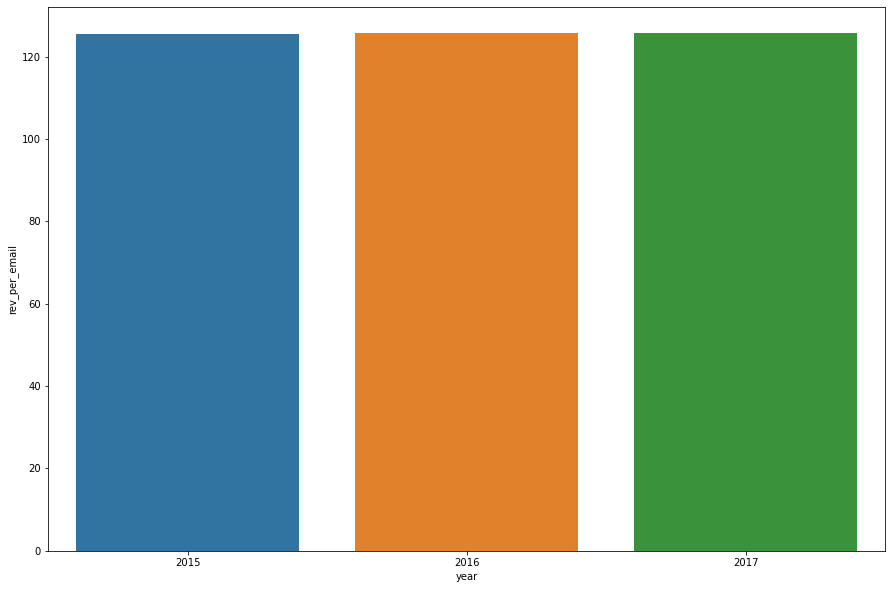

In [65]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=df_year_count.index, y=df_year_count['rev_per_email'])
#ax1 = fig.add_subplot(121)
plt.show()

## The above is a plot shows the average revenue per person per year.  
### As we can see, the average revnue is almost the same for all 3 years.

In [69]:
df_2015 = df[(df.year==2015)]

In [70]:
common_customers_15_16 = pd.merge(df_2015, df_2016, on='customer_email',how='inner')
common_customers_16_17 = pd.merge(df_2016, df_2017, on='customer_email',how='inner')

In [74]:
common_customers_15_16.head()

,index_x,customer_email,net_revenue_x,year_x,index_y,net_revenue_y,year_y
0,8,baiikostmd@gmail.com,170.70,2015,231302,142.57,2016
1,9,lfeafnigbu@gmail.com,54.99,2015,231303,35.06,2016
2,15,tqxsjlgjpi@gmail.com,107.71,2015,231309,33.50,2016
3,16,hxshgpdxtr@gmail.com,180.59,2015,231310,217.35,2016
4,24,zvhsssvgor@gmail.com,21.55,2015,231318,43.84,2016


In [78]:
growth_15_16 = common_customers_15_16.net_revenue_y.sum() -  common_customers_15_16.net_revenue_x.sum() 

growth_15_16_rate = growth_15_16/common_customers_15_16['customer_email'].count()

print(growth_15_16_rate*100)

34.1290614930182


In [79]:
growth_16_17 = common_customers_16_17.net_revenue_y.sum() -  common_customers_16_17.net_revenue_x.sum() 

growth_16_17_rate = growth_16_17/common_customers_16_17['customer_email'].count()

print(growth_16_17_rate*100)

98.34123765446977


In [85]:
x = pd.DataFrame()
x['growth_rate'] = [growth_15_16_rate*100, growth_16_17_rate*100]
x.head()

,growth_rate
0,34.129061
1,98.341238


In [86]:
x['year'] = ['2015-16','2016-17']

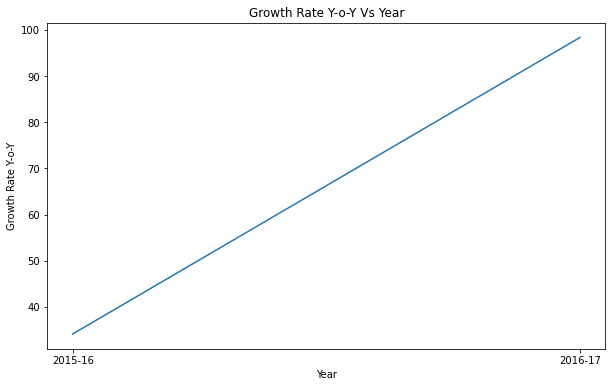

In [88]:
plt.figure(figsize = (10,6))
plt.plot(x['year'], x['growth_rate'])
plt.title('Growth Rate Y-o-Y Vs Year')
plt.xlabel('Year')
plt.ylabel('Growth Rate Y-o-Y')
plt.show()

## The above plot is the growth rate of income for the years given
### The rate  from 2015-16 increases from 34.1% to 98.3% in 2016-17

In [90]:
#customer churn rate calculation
df_churn_15_16 = df_2015[~df_2015["customer_email"].isin(df_2016["customer_email"])]
df_churn_16_17 = df_2016[~df_2016["customer_email"].isin(df_2017["customer_email"])]

In [91]:
df_churn_15_16.head()

,index,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


In [92]:
df_churn_16_17.head()

,index,customer_email,net_revenue,year
231294,231294,mwrossuukz@gmail.com,197.26,2016
231295,231295,gkwsoupawk@gmail.com,38.28,2016
231296,231296,vlyigtgfzs@gmail.com,154.57,2016
231297,231297,yfirychuhk@gmail.com,102.47,2016
231298,231298,trnzgqinuu@gmail.com,32.03,2016


In [93]:
df_only_2017 = df_2017[~df_2017["customer_email"].isin(df_2016["customer_email"])]

In [94]:
df_only_2017.head()

,index,customer_email,net_revenue,year
435940,435940,mwrossuukz@gmail.com,96.61,2017
435941,435941,qvjfterwnk@gmail.com,176.00,2017
435942,435942,vlyigtgfzs@gmail.com,73.47,2017
435943,435943,yfirychuhk@gmail.com,138.17,2017
435944,435944,fdkiioqtli@gmail.com,156.87,2017


In [95]:
no_left_2015 = df_churn_15_16.customer_email.count() - common_customers_15_16.customer_email.count()
no_left_2016 = df_churn_16_17.customer_email.count() - common_customers_16_17.customer_email.count()
print(no_left_2015)
print(no_left_2016)

112126
162728


In [96]:
churn_rate_2016 = (no_left_2015/df_2015.customer_email.count())*100
churn_rate_2017 = (no_left_2016/df_2016.customer_email.count())*100

print(churn_rate_2016)
print(churn_rate_2017)

48.47769505477877
79.51682417442804


In [99]:
y = pd.DataFrame()
y['churn_rate'] = [churn_rate_2016, churn_rate_2017]
y['year'] = ['2015-16','2016-17']
y.head()

,churn_rate,year
0,48.477695,2015-16
1,79.516824,2016-17


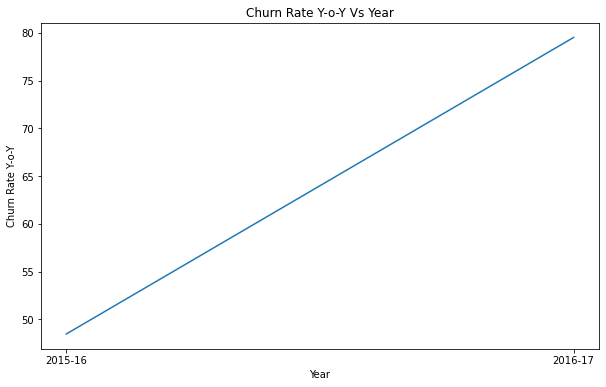

In [100]:
plt.figure(figsize = (10,6))
plt.plot(y['year'], y['churn_rate'])
plt.title('Churn Rate Y-o-Y Vs Year')
plt.xlabel('Year')
plt.ylabel('Churn Rate Y-o-Y')
plt.show()

## The above plot shows the churn rate in 2016 and 2017. More number of customers left in 2017 than in 2016